# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import os

from waymo_open_dataset import dataset_pb2 as open_dataset
from waymo_open_dataset.utils import range_image_utils
from waymo_open_dataset.utils import transform_utils
from waymo_open_dataset.utils import  frame_utils

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow.compat.v1 as tf


%matplotlib inline

In [2]:
data_dir = './data/train/*.tfrecord'
dataset = get_dataset(data_dir)

INFO:tensorflow:Reading unweighted datasets: ['./data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 48
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


In [3]:
print("Lets print just the first row in dataset :","\n",list(dataset.take(1).as_numpy_iterator()),"\n")

Lets print just the first row in dataset : 
 [{'image': array([[[142, 177, 219],
        [143, 178, 220],
        [142, 176, 221],
        ...,
        [145, 174, 218],
        [144, 172, 219],
        [143, 171, 218]],

       [[142, 177, 219],
        [143, 178, 220],
        [143, 177, 222],
        ...,
        [145, 174, 218],
        [143, 171, 218],
        [142, 170, 217]],

       [[141, 176, 218],
        [142, 177, 219],
        [143, 177, 222],
        ...,
        [145, 174, 218],
        [143, 171, 218],
        [141, 169, 216]],

       ...,

       [[ 63,  77,  90],
        [ 64,  78,  91],
        [ 65,  79,  92],
        ...,
        [ 76,  93, 113],
        [ 76,  93, 113],
        [ 75,  92, 112]],

       [[ 63,  77,  90],
        [ 64,  78,  91],
        [ 65,  79,  92],
        ...,
        [ 76,  93, 113],
        [ 76,  93, 113],
        [ 75,  92, 112]],

       [[ 63,  77,  90],
        [ 65,  79,  92],
        [ 66,  80,  93],
        ...,
        [ 75,  92,

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [10]:
def display_instances(batch, index):
    # print(index)
    color_map = {1: 'red', 2: 'blue', 4: 'green'}
    
    _, ax = plt.subplots(1, figsize=(10, 10))
    image = batch["image"].numpy()
    h, w, _c = image.shape
    ax.imshow(image.astype(np.uint8))
    
    # print(image.shape)
    
    boxes = batch["groundtruth_boxes"].numpy()
    boxes[:, (0, 2)] *= h * h / 1280
    boxes[:, (1, 3)] *= w * w / 1920
    
    labels = batch["groundtruth_classes"].numpy()
    
    for box, label in zip(boxes, labels):
        
        y1, x1, y2, x2 = box
        
        # print(box)
        
        ax.add_patch(patches.Rectangle(
                xy=(x1, y1),
                width=(x2-x1),
                height=(y2-y1),
                linewidth=1,
                edgecolor=color_map[label],
                facecolor='none'))
        
    plt.title(f'Image {index + 1}')
    plt.grid(False)
    plt.axis('off')
    plt.show()
    
    return

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

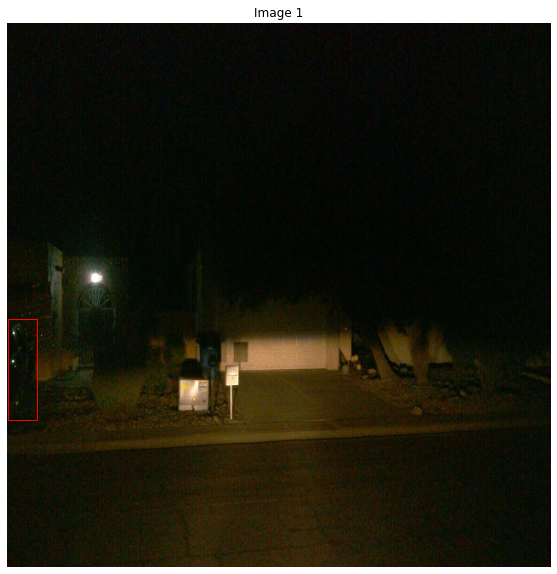

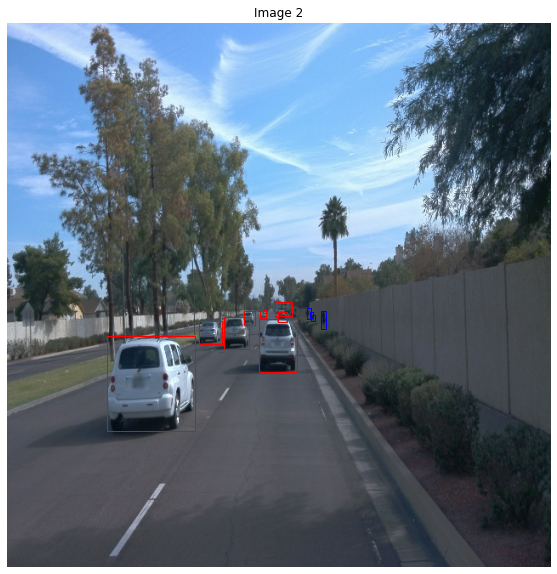

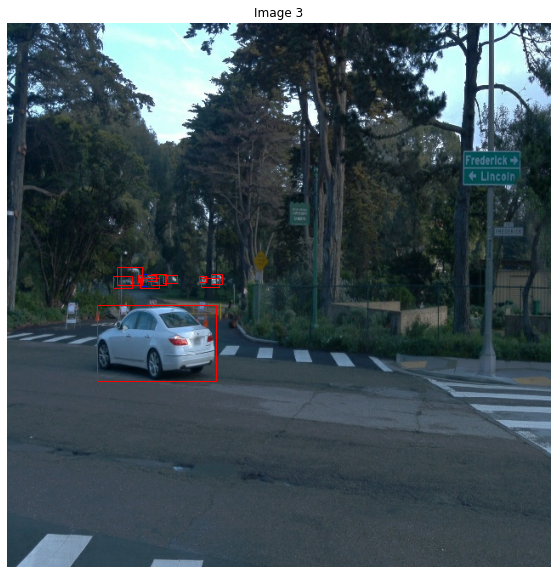

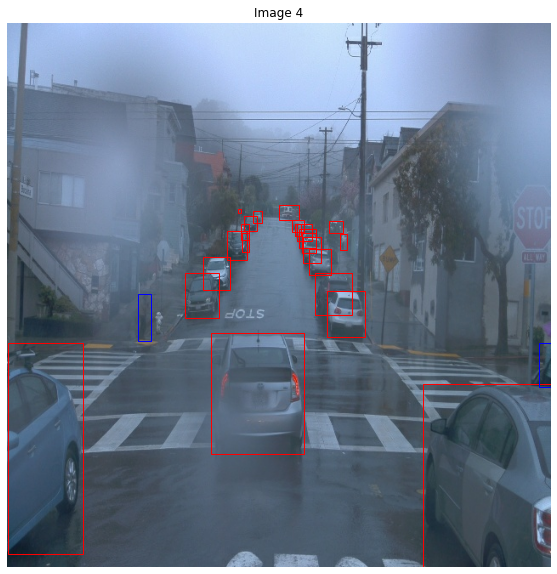

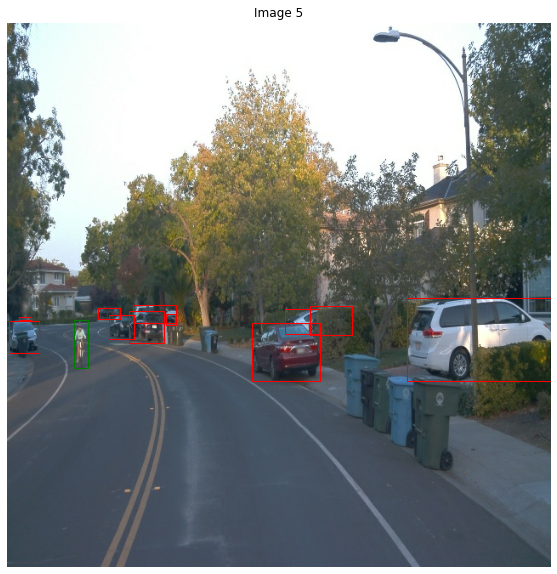

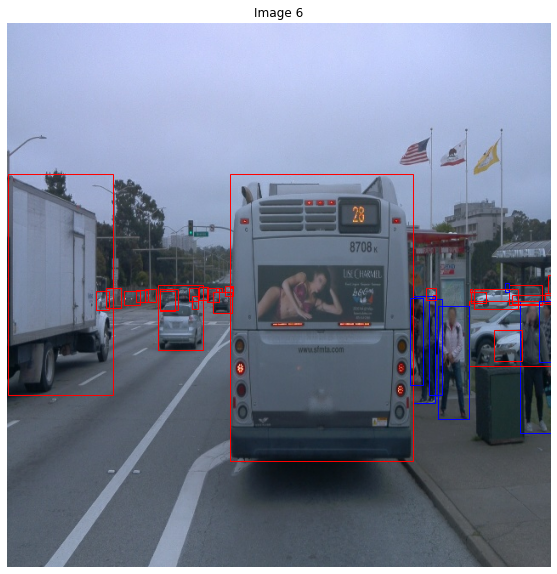

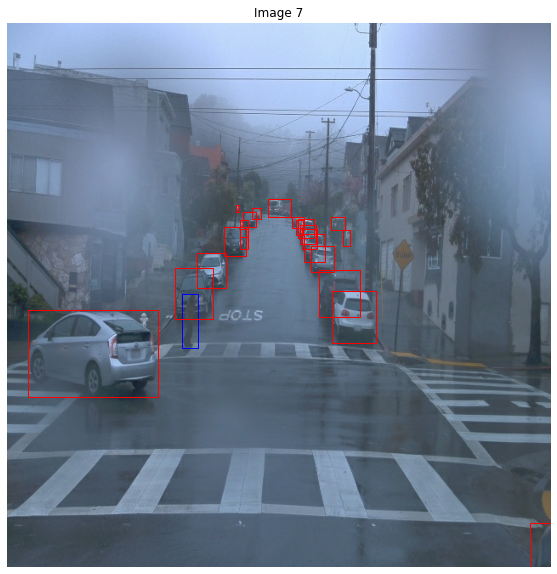

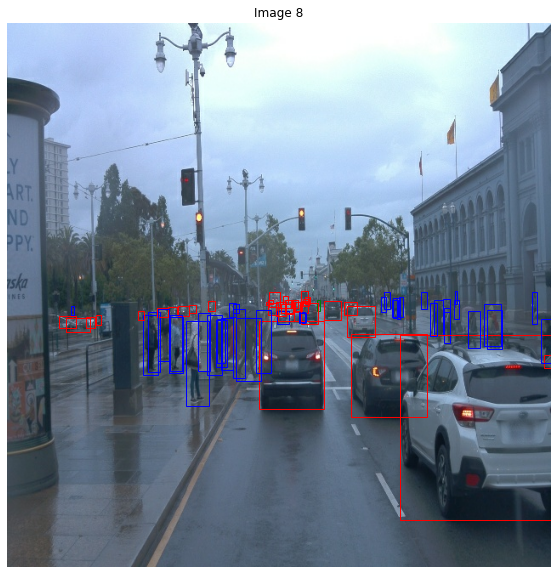

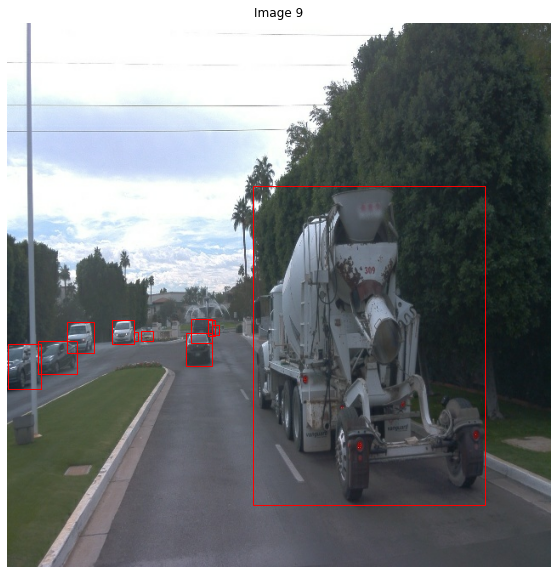

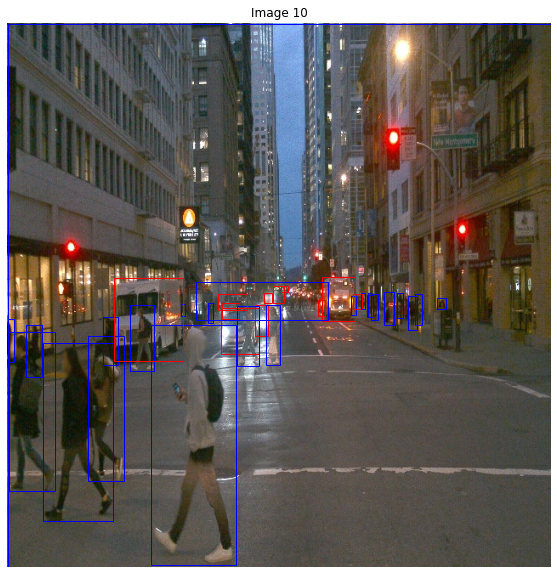

In [11]:
# Number of images to show
num_images = 10

# Show images and bbox in for loop (num_images)
for index, batch in enumerate(dataset.shuffle(75, reshuffle_each_iteration=True).take(num_images)):
    display_instances(batch, index)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [12]:
# Number of images to show
num_images = 1

print("Lets print using the batch.items() :")

for index, batch in enumerate(dataset.shuffle(75, reshuffle_each_iteration=True).take(num_images)):
    for m1,m2 in batch.items():
        print("{:20s}: {}".format(m1, m2))

Lets print using the batch.items() :
image               : [[[ 87 136 194]
  [ 88 137 195]
  [ 90 136 195]
  ...
  [ 66  66  66]
  [ 54  54  52]
  [ 57  57  55]]

 [[ 88 137 195]
  [ 89 138 196]
  [ 91 137 196]
  ...
  [ 56  56  56]
  [ 53  53  51]
  [ 60  60  58]]

 [[ 88 137 195]
  [ 89 138 196]
  [ 91 137 196]
  ...
  [ 63  63  63]
  [ 49  49  47]
  [ 54  55  50]]

 ...

 [[ 81  84  91]
  [ 84  87  94]
  [ 85  88  95]
  ...
  [ 91  94  99]
  [ 92  97 101]
  [ 91  96 100]]

 [[ 84  87  94]
  [ 88  91  98]
  [ 90  93 100]
  ...
  [ 91  94  99]
  [ 92  97 101]
  [ 91  96 100]]

 [[ 84  87  94]
  [ 86  89  96]
  [ 86  89  96]
  ...
  [ 93  96 101]
  [ 93  98 102]
  [ 90  95  99]]]
source_id           : b'segment-1022527355599519580_4866_960_4886_960_with_camera_labels_50.tfrecord'
key                 : b''
filename            : b'segment-1022527355599519580_4866_960_4886_960_with_camera_labels_50.tfrecord'
groundtruth_image_confidences: []
groundtruth_verified_neg_classes: []
groundtrut

# Exploring waymo dataset

## Read one frame

Each file in the dataset is a sequence of frames ordered by frame start timestamps. We have extracted two frames from the dataset to demonstrate the dataset format.

In [29]:
filenames =['./data/train/training_segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']

raw_dataset = tf.data.TFRecordDataset(filenames, compression_type='')

for data in raw_dataset:
    frame = open_dataset.Frame()
    frame.ParseFromString(bytearray(data.numpy()))
    break

In [30]:
(range_images, camera_projections,
 range_image_top_pose) = frame_utils.parse_range_image_and_camera_projection(frame)

## Examine frame context

Refer to [dataset.proto](https://github.com/waymo-research/waymo-open-dataset/blob/master/waymo_open_dataset/dataset.proto) for the data format. The context contains shared information among all frames in the scene.

In [24]:
print(frame.context)

name: "1005081002024129653_5313_150_5333_150"
camera_calibrations {
  name: FRONT
  intrinsic: 2083.091212133254
  intrinsic: 2083.091212133254
  intrinsic: 957.2938286685071
  intrinsic: 650.5697927719348
  intrinsic: 0.04067236637270731
  intrinsic: -0.3374271466716414
  intrinsic: 0.0016273829099200004
  intrinsic: -0.0007879327563938157
  intrinsic: 0.0
  extrinsic {
    transform: 0.9999151800844592
    transform: -0.008280529275085654
    transform: -0.010053132426658727
    transform: 1.5444145042510942
    transform: 0.008380895965622895
    transform: 0.9999150476776223
    transform: 0.009982885888937929
    transform: -0.022877347388980857
    transform: 0.009969614810858722
    transform: -0.010066293398396434
    transform: 0.9998996332221252
    transform: 2.115953541712884
    transform: 0.0
    transform: 0.0
    transform: 0.0
    transform: 1.0
  }
  width: 1920
  height: 1280
  rolling_shutter_direction: RIGHT_TO_LEFT
}
camera_calibrations {
  name: FRONT_LEFT
  intr

## Print camera_labels

In [25]:
print(frame.camera_labels)

[name: FRONT
labels {
  box {
    center_x: 809.6983799999999
    center_y: 720.0126
    width: 75.15921000000003
    length: 89.68578000000002
  }
  type: TYPE_VEHICLE
  id: "1a7162c2-e63a-42b2-96dd-9f3ba7ee5568"
  detection_difficulty_level: LEVEL_2
  tracking_difficulty_level: LEVEL_2
}
labels {
  box {
    center_x: 969.49065
    center_y: 681.48561
    width: 22.10564999999997
    length: 31.579500000000053
  }
  type: TYPE_VEHICLE
  id: "1fa810d1-9956-4238-8ca5-41d8a0203cc9"
  detection_difficulty_level: LEVEL_2
  tracking_difficulty_level: LEVEL_2
}
labels {
  box {
    center_x: 954.96408
    center_y: 671.3801699999999
    width: 12.631799999999998
    length: 13.263389999999958
  }
  type: TYPE_VEHICLE
  id: "3b6a8c8c-7940-453d-a22c-4c3bd9ed9c1c"
  detection_difficulty_level: LEVEL_2
  tracking_difficulty_level: LEVEL_2
}
labels {
  box {
    center_x: 500.21928
    center_y: 841.27788
    width: 228.00398999999993
    length: 324.00567000000007
  }
  type: TYPE_VEHICLE
  id:

## Show image from camera

Cameras >> FRONT, FRONT_LEFT, SIDE_LEFT, FRONT_RIGHT, SIDE_RIGHT


In [26]:
# Mapping cameras
camera_map = {1: 'FRONT', 2: 'FRONT_LEFT', 3: 'SIDE_LEFT', 4: 'FRONT_RIGHT', 5: 'SIDE_RIGHT', 6: 'ALL'}

In [27]:
# Function in waymo colaboratory
# font --> https://colab.research.google.com/github/waymo-research/waymo-open-dataset/blob/r1.0/tutorial/tutorial.ipynb#scrollTo=18KfxT8RkMv0
def show_camera_image(camera_image, camera_labels, layout, cmap=None):
    """Show a camera image and the given camera labels."""

    ax = plt.subplot(*layout)

    # Draw the camera labels.
    for camera_labels in frame.camera_labels:
        # Ignore camera labels that do not correspond to this camera.
        if camera_labels.name != camera_image.name:
            continue

    # Iterate over the individual labels.
    for label in camera_labels.labels:
        # Draw the object bounding box.
        
        print(label)
        
        ax.add_patch(patches.Rectangle(
            xy=(label.box.center_x - 0.5 * label.box.length,
                label.box.center_y - 0.5 * label.box.width),
            width=label.box.length,
            height=label.box.width,
            linewidth=1,
            edgecolor='red',
            facecolor='none'))

    # Show the camera image.
    plt.imshow(tf.image.decode_jpeg(camera_image.image), cmap=cmap)
    plt.title(open_dataset.CameraName.Name.Name(camera_image.name))
    plt.grid(False)
    plt.axis('off')
    
    return

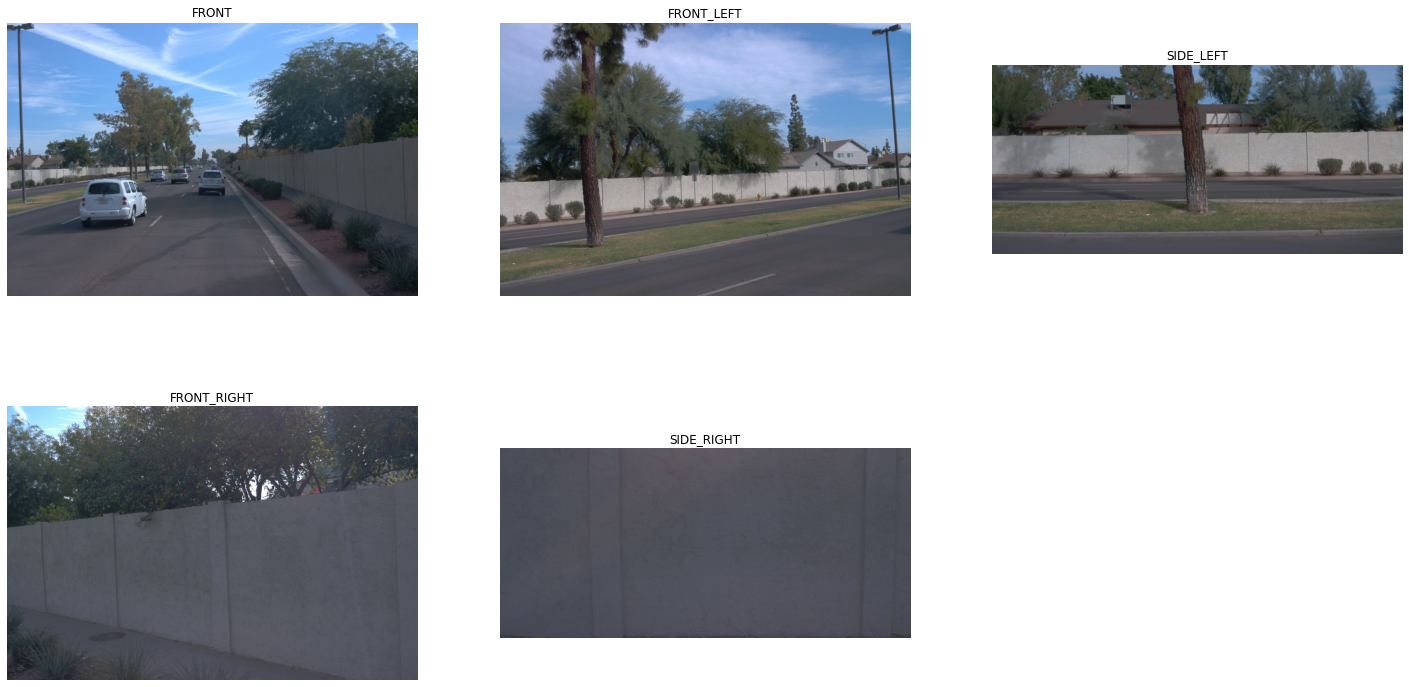

In [31]:
plt.figure(figsize=(25, 20))

camera = 6

for index, image in enumerate(frame.images):
    if (camera < 6):
        if (open_dataset.CameraName.Name.Name(image.name) == camera_map[camera]):
            show_camera_image(image, frame.camera_labels, [3, 3, index+1])
    else:
        show_camera_image(image, frame.camera_labels, [3, 3, index+1])

In [20]:
# Function: check number of records
def countRecords(ds:tf.data.Dataset):
    count = 0

    if tf.executing_eagerly():
        # TF v2 or v1 in eager mode
        for r in ds:
            count += 1
    else:  
        # TF v1 in non-eager mode
        iterator = tf.compat.v1.data.make_one_shot_iterator(ds)
        next_batch = iterator.get_next()
        with tf.compat.v1.Session() as sess:
            try:
                while True:
                    sess.run(next_batch)
                    count = count+1    
            except tf.errors.OutOfRangeError:
                pass
  
    return count

In [21]:
print(countRecords(raw_dataset))

199
